In [1]:
import yfinance as yf
import pandas as pd
import stock_analysis
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
end = dt.datetime.now(stock_analysis.timezone)
start = dt.datetime(year=end.year - 10, month=end.month, day=end.day, tzinfo=stock_analysis.timezone)

In [3]:
symbol="ABR"
initial_cash = 10000

In [4]:
ticker = yf.Ticker(symbol)
prices = ticker.history(start=start, end=end)
prices.index = pd.to_datetime(prices.index)
prices.index = prices.index.tz_convert(stock_analysis.timezone)

In [5]:
div_events = stock_analysis.gather_dividends(symbol, start, end)
current_event = div_events.iloc[-1]
dividend_period = current_event["frequency"]
f"Latest dividend is {current_event['cash_amount']}. Dividends are paid {stock_analysis.frequency_map.get(current_event['frequency'])}"

INFO:root:size: 41, ex_dividend_date: 2024-11-15, symbol: ABR


'Latest dividend is 0.43. Dividends are paid Quarterly'

In [6]:
div_events = stock_analysis.trim_div_events(div_events, end)
snowball = stock_analysis.dividend_snowball(prices, div_events, initial_cash)
snowball["value"] = snowball["Close"] * snowball["quantity"]

In [7]:
approaches = []

In [8]:
final_value = snowball.iloc[-1].value
approaches.append(stock_analysis.create_approach_summary("Reinvest Dividends", final_value, initial_cash, 0.0))
dividends_gathered = stock_analysis.dividend_keep_the_cash(prices, div_events, initial_cash)
final_value = dividends_gathered.iloc[-1].value
cash_in_bank = dividends_gathered.total_dividend.sum()
approaches.append(stock_analysis.create_approach_summary("Keep the Cash", final_value, initial_cash, cash_in_bank))

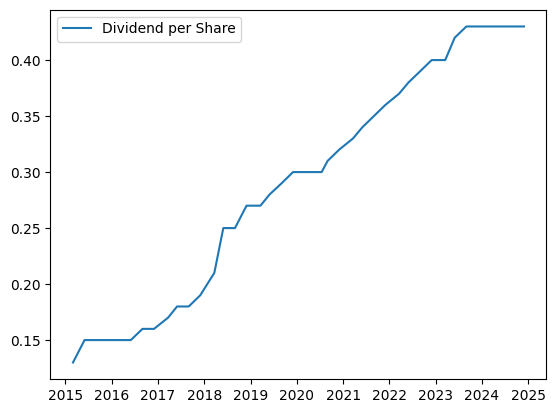

In [9]:
plt.plot(div_events.index, div_events["cash_amount"], label="Dividend per Share")
plt.title = f"Dividend per share of {symbol}"
plt.legend()
plt.show()

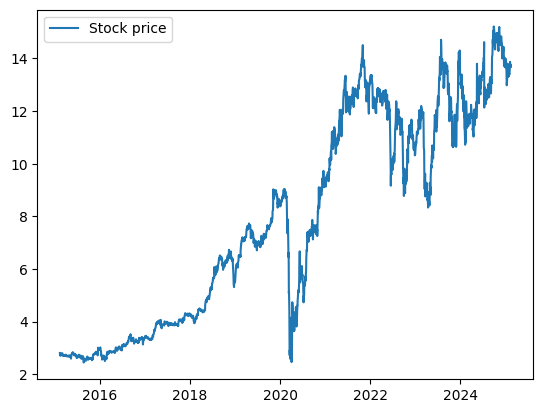

In [10]:
plt.plot(snowball.index, snowball["Close"], label="Stock price")
plt.title = f"Stock Price of {symbol}"
plt.legend()
plt.show()

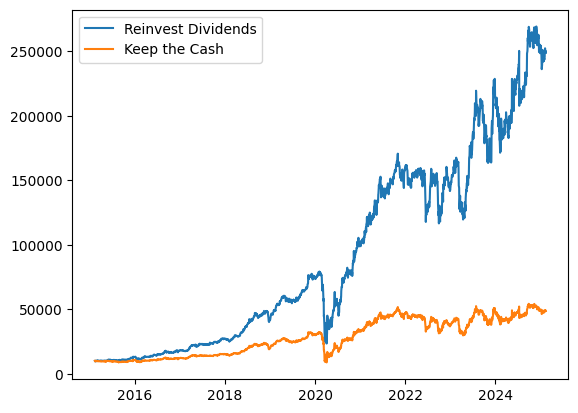

In [11]:
plt.plot(snowball.index, snowball['value'], label='Reinvest Dividends')
plt.plot(dividends_gathered.index, dividends_gathered['value'], label='Keep the Cash')
plt.title = f"Ten year performance {symbol}"
plt.legend()
plt.show()

In [12]:
pd.DataFrame(approaches).set_index("Approach")

,Final Market Amount($),Market Profit($),Market Gain(%),Cash Kept($),Total Profit($),Total Gain(%)
Approach,,,,,,
Reinvest Dividends,248767.60,238767.60,2387.68,0.00,238767.60,2387.68
Keep the Cash,48720.18,38720.18,387.20,41291.91,80012.09,800.12
